In [15]:
import torch
import nrrd
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset
from torchvision.transforms import Resize
from pathlib import Path
from tqdm import tqdm

In [16]:
asoca_path = Path.cwd().parent / "data" / "ASOCA"
normal_path = asoca_path / "Normal"
diseased_path = asoca_path / "Diseased"

In [17]:
ctca_normal = normal_path / "CTCA"
annotations_normal = normal_path / "Annotations"

In [36]:
ctca_data_normal, header = nrrd.read(ctca_normal / "Normal_1.nrrd")
annotated_data_normal, _ = nrrd.read(annotations_normal / "Normal_1.nrrd")

In [38]:
header["space directions"]

array([[0.416016, 0.      , 0.      ],
       [0.      , 0.416016, 0.      ],
       [0.      , 0.      , 0.625   ]])

In [19]:
print(ctca_data_normal.shape)
print(annotated_data_normal.shape)

(512, 512, 204)
(512, 512, 204)


In [20]:
annotated_data_normal.min()

0

In [21]:
annotated_data_normal.max()

1

In [22]:
ctca_data_normal.min()

-3024

In [23]:
ctca_data_normal.max()

1659

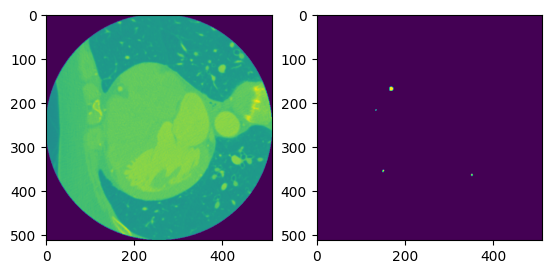

In [24]:
_, ax = plt.subplots(ncols=2)
ax[0].imshow(ctca_data_normal[:,:,100])
ax[1].imshow(annotated_data_normal[:,:,100]);

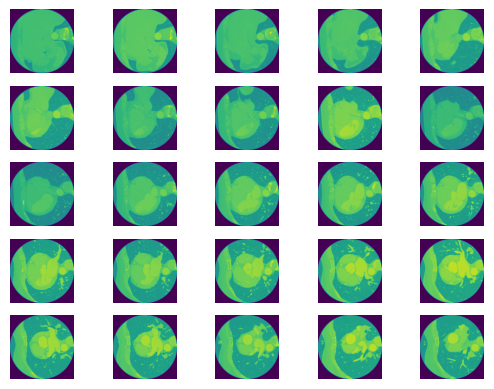

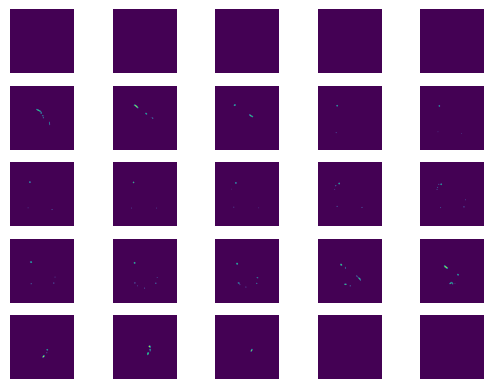

In [33]:
def display_images_3d(data, nrows=5, ncols=5):
    _, ax = plt.subplots(nrows=nrows, ncols=ncols)
    num_slices = ctca_data_normal.shape[-1]
    slice_idx = [i for i in range(0, num_slices, num_slices//(nrows*ncols))]
    i,j=0,0
    
    for slice in slice_idx:
        if j > ncols-1:
            j=0
            i+=1
            if i >= nrows:
                break
        
        ax[i, j].axis("off")
        ax[i,j].imshow(data[:,:,slice])
        j+=1

display_images_3d(ctca_data_normal)
display_images_3d(annotated_data_normal)

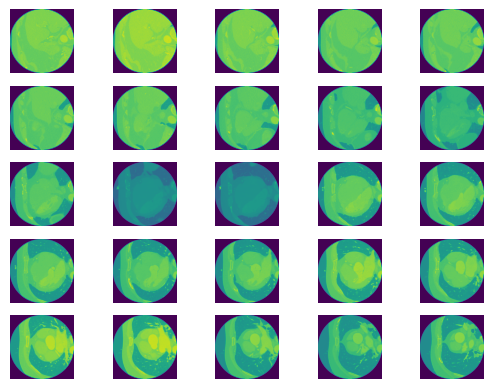

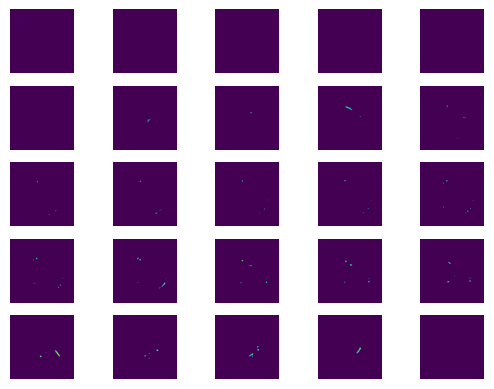

In [34]:
ctca_diseased = diseased_path / "CTCA"
annotations_diseased = diseased_path / "Annotations"
ctca_data_diseased, _ = nrrd.read(ctca_diseased / "Diseased_5.nrrd")
annotated_data_diseased, _ = nrrd.read(annotations_diseased / "Diseased_5.nrrd")

display_images_3d(ctca_data_diseased)
display_images_3d(annotated_data_diseased)